<h4>Importing Libraries</h4>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import nltk
from imblearn.under_sampling import RandomUnderSampler

<h4>Downloading NLTK Resources</h4>

In [100]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sabalan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sabalan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sabalan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h4>Loading Dataset</h4>

In [2]:
train_dt = pd.read_csv(r'C:\\Users\Sabalan\Desktop\result\Untitled Folder\data\train_data.csv', dtype={'vote': 'str'})
title_dt = pd.read_csv(r'C:\\Users\Sabalan\Desktop\result\Untitled Folder\data\title_brand.csv')

In [101]:
train_dt.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote_replaced,text_length
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400,NaN,561
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200,NaN,450
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000,NaN,205
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600,NaN,284
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600,NaN,247


<h4>P1</h4>
<h6>
  توزیع ستون overall را رسم کنید. آیا مجموعه‌داده متوازن است؟ اگر خیر، آیا نیاز است برای مدل‌سازی خود آن را متوازن کنید؟ چه راه‌حلی برای این کار پیشنهاد می‌کنید؟  
<h6p>

<Axes: >

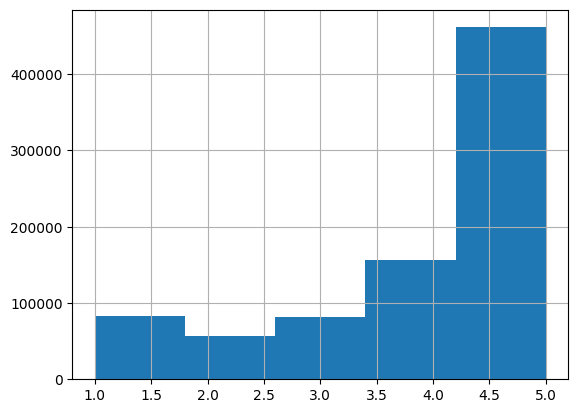

In [4]:
train_dt['overall'].hist(bins=5)

In [7]:
train_dt['overall'].value_counts()

overall
5    461485
4    156514
1     82950
3     81239
2     56756
Name: count, dtype: int64

<h6>
   داده هارو متوازن میکنیم RandomUnderSampler()داده ها نامتوازن هستند و ما با 
</h6>

In [8]:
X = train_dt.drop('overall', axis=1)  
y = train_dt['overall']

In [9]:
undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X, y)

<Axes: >

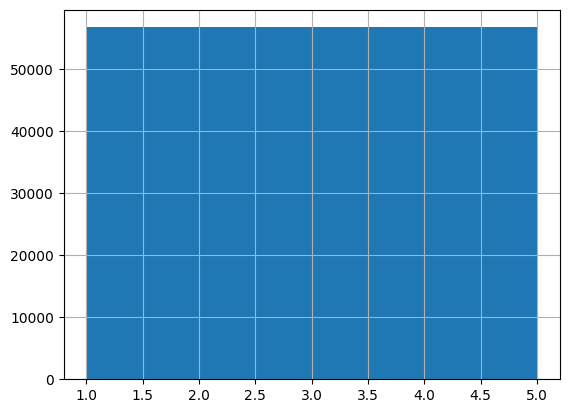

In [10]:
y_resampled.hist(bins=5)

<h4>
    P2
</h4>
<h6>
     برای سه دسته یک ابر کلمات رسم کنید 
</h6>

In [18]:
def preprocess_text(text):
    text = text.lower() 
    text = ''.join([char for char in text if char not in string.punctuation])  
    words = text.split()
    return ' '.join(words)

In [19]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

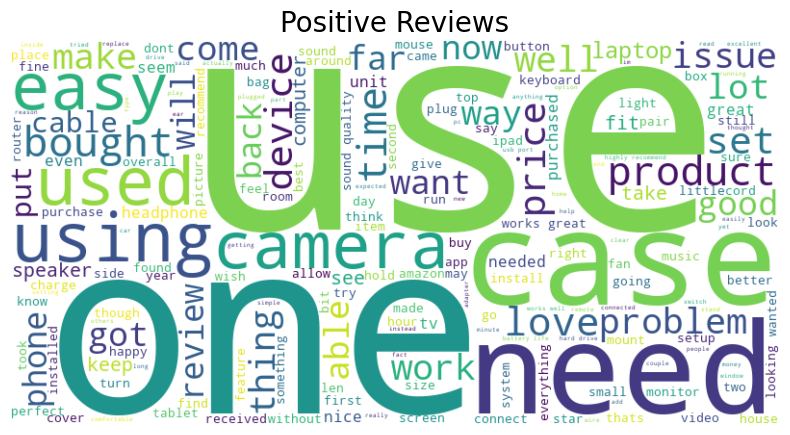

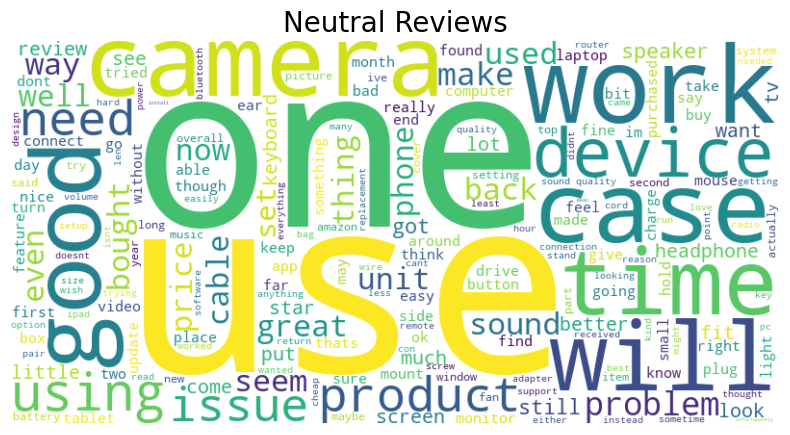

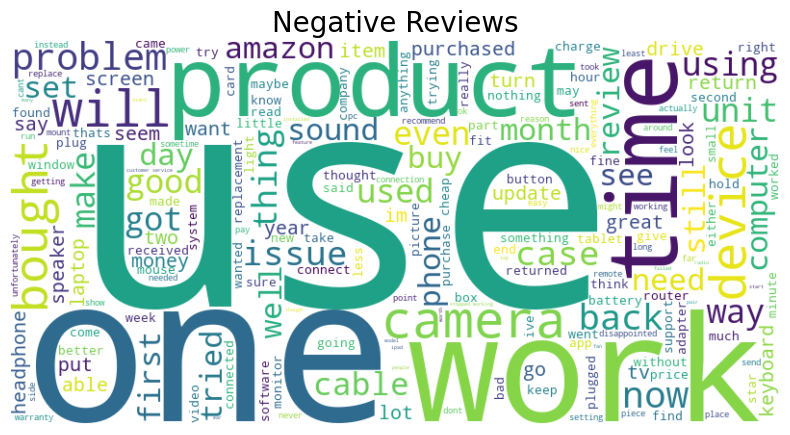

In [20]:
positive_reviews = train_dt[(train_dt['overall'] == 4) | (train_dt['overall'] == 5)]['reviewText']
neutral_reviews = train_dt[train_dt['overall'] == 3]['reviewText']
negative_reviews = train_dt[(train_dt['overall'] == 1) | (train_dt['overall'] == 2)]['reviewText']


positive_reviews = positive_reviews.apply(preprocess_text)
neutral_reviews = neutral_reviews.apply(preprocess_text)
negative_reviews = negative_reviews.apply(preprocess_text)

positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

plot_wordcloud(positive_text, 'Positive Reviews')
plot_wordcloud(neutral_text, 'Neutral Reviews')
plot_wordcloud(negative_text, 'Negative Reviews')

<h6>
  هاstopwords حذف کلمات پرتکرار و مشترک و 
</h6>

In [21]:
stopwords_att = ['use', 'device', 'camera', 'laptop', 'speaker', 'keyboard', 'computer', 'video', 'picture', 'phone', 'setting', 'card', 'system', 'radio', 'one', 'headphone']


In [72]:
stopwords_list = list(stopwords.words('english'))
stopwords_list.append(i for i in stopwords_att)
def preprocess_text_updated_list(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords_list] 
    return ' '.join(words)

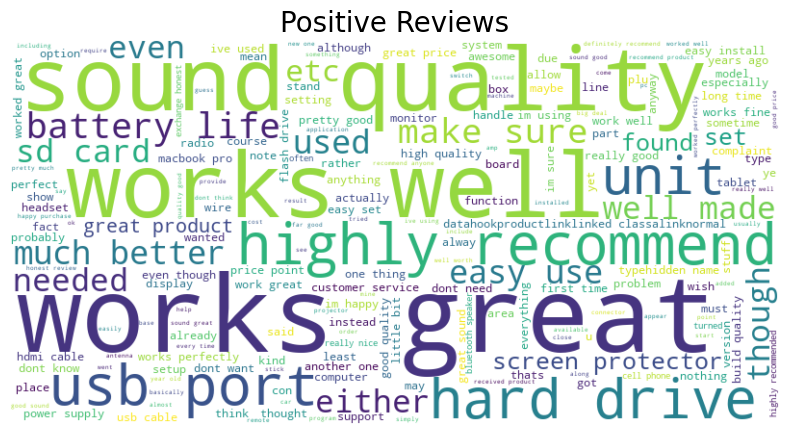

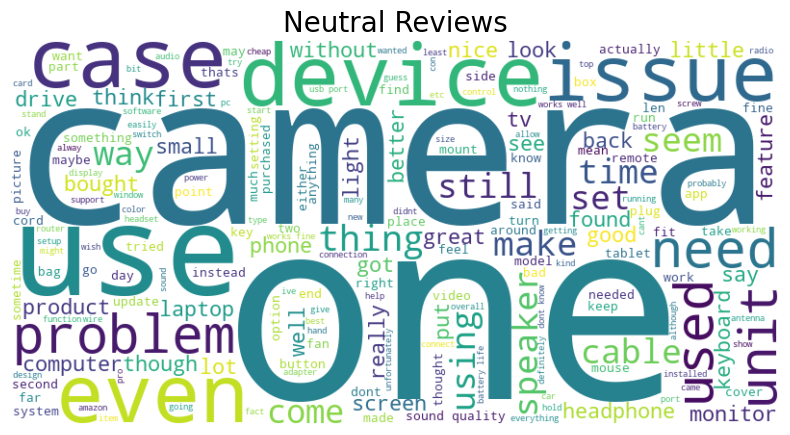

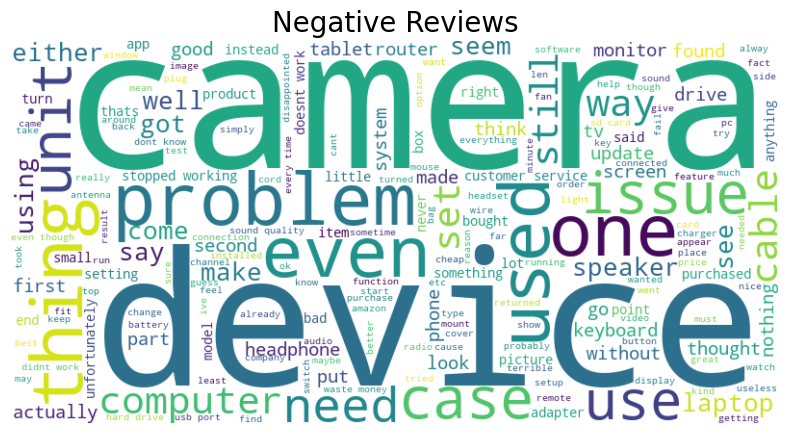

In [73]:
positive_reviews = train_dt[(train_dt['overall'] == 4) | (train_dt['overall'] == 5)]['reviewText']
neutral_reviews = train_dt[train_dt['overall'] == 3]['reviewText']
negative_reviews = train_dt[(train_dt['overall'] == 1) | (train_dt['overall'] == 2)]['reviewText']


positive_reviews = positive_reviews.apply(preprocess_text_updated_list)
neutral_reviews = neutral_reviews.apply(preprocess_text_updated_list)
negative_reviews = negative_reviews.apply(preprocess_text_updated_list)


positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

plot_wordcloud(positive_text, 'Positive Reviews')
plot_wordcloud(neutral_text, 'Neutral Reviews')
plot_wordcloud(negative_text, 'Negative Reviews')

<h6>
  نمابش صفات سه دسته
</h6>

In [74]:
def preprocess_text_adj_filter(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    adjectives = [word for word, pos in tagged if pos.startswith('JJ')] 
    return ' '.join(adjectives) 


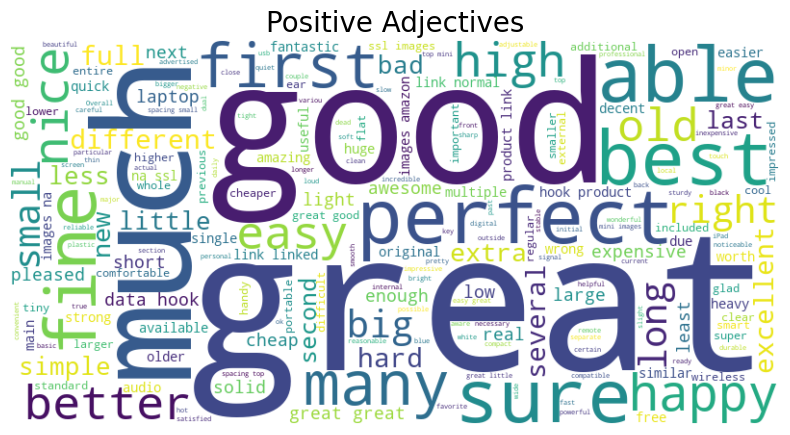

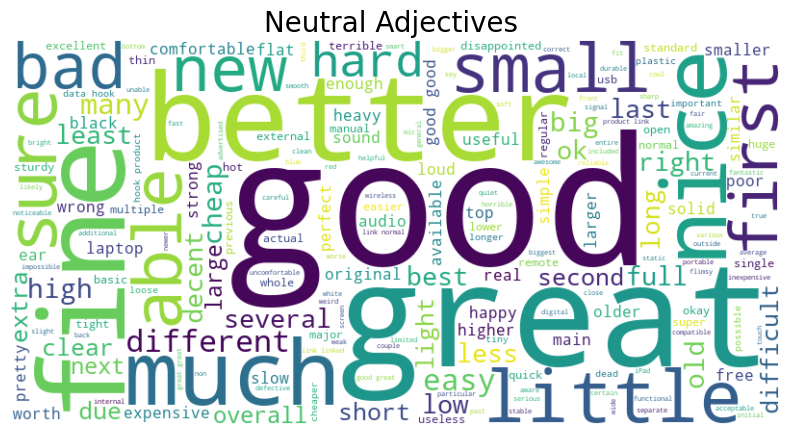

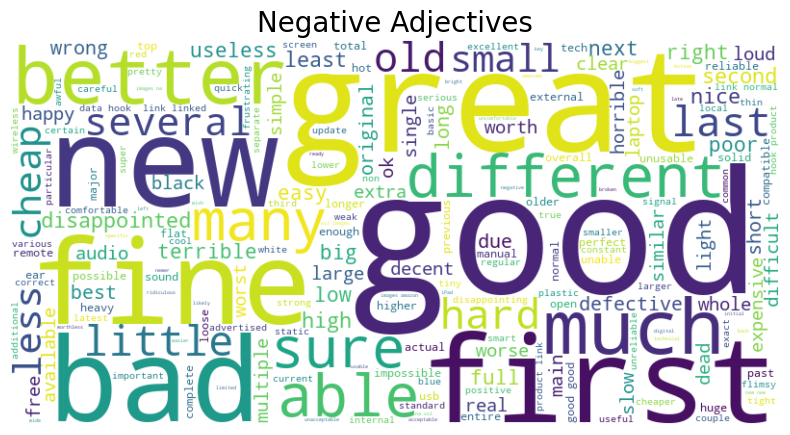

In [80]:
positive_reviews = train_dt[(train_dt['overall'] == 4) | (train_dt['overall'] == 5)]['reviewText']
neutral_reviews = train_dt[train_dt['overall'] == 3]['reviewText']
negative_reviews = train_dt[(train_dt['overall'] == 1) | (train_dt['overall'] == 2)]['reviewText']

positive_reviews = positive_reviews.apply(preprocess_text_adj_filter)
neutral_reviews = neutral_reviews.apply(preprocess_text_adj_filter)
negative_reviews = negative_reviews.apply(preprocess_text_adj_filter)

positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

plot_wordcloud(positive_text, 'Positive Adjectives')
plot_wordcloud(neutral_text, 'Neutral Adjectives ')
plot_wordcloud(negative_text, 'Negative Adjectives')

<h4>
    P3
</h4>
<h6>
      ده نفری که در مجموع نظرات‌شان بیشتر مفید واقع شده 
</h6>

In [103]:
train_dt['vote_replaced'] = train_dt['vote'].str.replace(',', '')
train_dt['vote_replaced'] = train_dt['vote_replaced'].astype('float')

In [106]:
vote_cnt = train_dt.groupby(['reviewerID', 'reviewerName']).agg({'vote_replaced': 'sum'})
vote_cnt = vote_cnt.sort_values(by='vote_replaced', ascending=False)[:10]

In [108]:
vote_cnt.columns = ['total votes']

In [109]:
vote_cnt

,,total votes
reviewerID,reviewerName,
A25GROL6KJV3QG,Benson Leung,4572.0
A3KJ0DF3LTNJ6X,Voltron00x,3181.0
A2IK776FY6MEMG,Obi Wan,3150.0
A1KPFZCS71QKW5,nycebo,2978.0
AMYCUX8EWEUVV,Mayra S.,2631.0
ADLVFFE4VBT8,Cthulhu,2607.0
A1GHPJB2N0D0RL,Chris Upton,2167.0
AW7UMXXJKFSNS,Sally B.,1912.0
A33AN9NP6574M2,DJ,1867.0


<h4>P4</h4>
<h6>هیستوگرام طول متن (تعداد کاراکتر) ستون ریویو تکست را رسم کنید. یک‌بار با حالت اصلی رسم کنید و یک‌بار به‌صورت فیلترشده (آن دسته‌هایی که تعداد نمونه‌های کم و پرتی دارند را در نظر نگیرید) ترسیم کنید.</h6>

In [110]:
def ret_len(i):
    return len(i)

In [111]:
train_dt['text_length'] = train_dt['reviewText'].apply(lambda row: ret_len(row))

In [112]:
train_dt['text_length']

0         561
1         450
2         205
3         284
4         247
         ... 
838939    276
838940    228
838941    242
838942    528
838943    432
Name: text_length, Length: 838944, dtype: int64

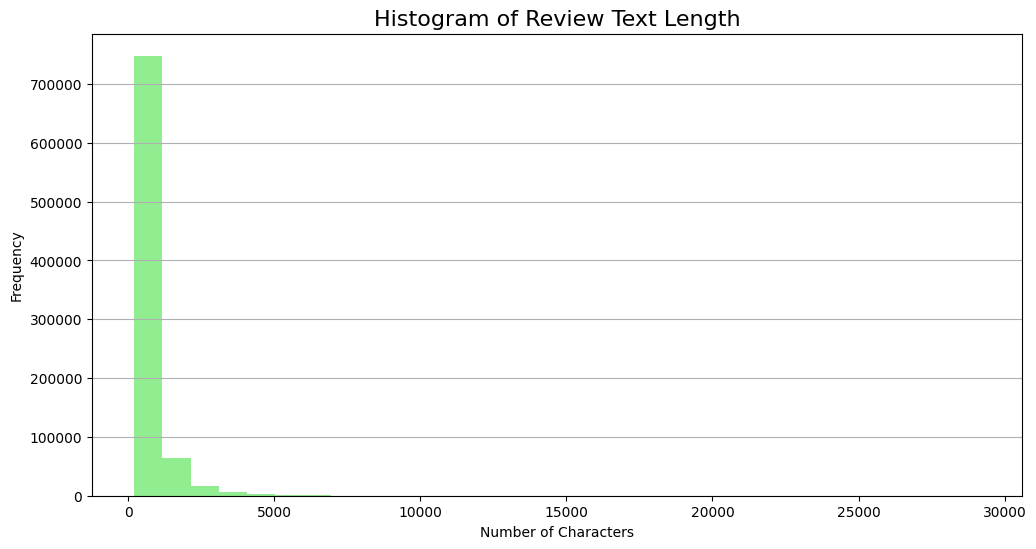

In [86]:
plt.figure(figsize=(12, 6))
plt.hist(train_dt['text_length'], bins=30, color='lightgreen')
plt.title('Histogram of Review Text Length', fontsize=16)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=1)
plt.show()


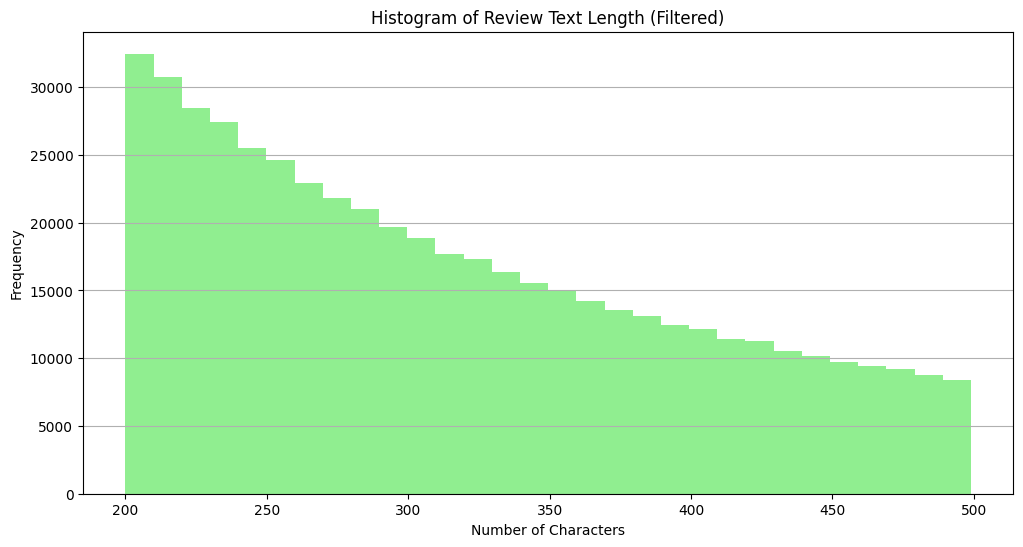

In [113]:
filtered_train_dt = train_dt[(train_dt['text_length'] > 0) & (train_dt['text_length'] < 500)]
plt.figure(figsize=(12, 6))
plt.hist(filtered_train_dt['text_length'], bins=30, color='lightgreen')
plt.title('Histogram of Review Text Length (Filtered)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=1)
plt.show()

<h4>P5</h4>
<h6>کدام محصولات بیشترین امتیاز ۵ را کسب کرده‌اند؟ ۱۰ مورد برتر را به‌ترتیب به‌صورت یک جدول شامل نام برند، عنوان محصول و تعداد نظرات با امتیاز ۵ نمایش دهید.
</h6>

In [122]:
overall_cnt = train_dt[train_dt['overall'] == 5].groupby(by='asin').agg({'vote': 'count'})
top10_prd = overall_cnt.sort_values(by='vote', ascending=False)[:10]
top10_prd = top10_prd.merge(title_dt, on='asin')

In [123]:
top10_prd2 = top10_prd.copy()

In [118]:
# top10_prd2.columns = ['vote', 'brand', 'title', 'asin']

In [127]:
top10_prd = pd.DataFrame()
top10_prd['asin'], top10_prd['brand'], top10_prd['title'], top10_prd['five_star_count'] = top10_prd2['asin'], top10_prd2['brand'], top10_prd2['title'], top10_prd2['vote'] 

In [128]:
top10_prd.set_index('asin')

,brand,title,five_star_count
asin,,,
B00S9SGNNS,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,105
B01A7G35S0,1MORE,1MORE Triple Driver In-Ear Earphones Hi-Res He...,101
B00WF78GS4,Aiwa,Aiwa Exos-9 Portable Bluetooth Speaker,99
B01DA0YCNC,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...,97
B009ZGK6QS,BAFX Products,BAFX Products IR Remote Control Extender/IR Re...,95
B01DUTOI5U,Samsung,Samsung UN40KU6300 40-Inch 4K Ultra HD Smart L...,86
B003Y5RYNY,TP-LINK,TP-Link N450 Wi-Fi Router - Wireless Internet ...,86
B00Y01VRSO,eero,eero Home WiFi System (Individual) - 1st Gener...,83
B010OYASRG,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,83


<h4>P6</h4>
<h6>ابتدا ۱۰ برندی که بیشترین تعداد نظر را داشته‌اند پیدا کنید. سپس میانگین امتیاز هر کدام را محاسبه کرده و یک جدول شامل نام برند و میانگین امتیاز آن به‌ترتیب میانگین امتیاز نمایش دهید.
</h6>

In [93]:
train_dt_mrg = train_dt.merge(title_dt, on='asin')
brand_grp = train_dt_mrg.groupby(by='brand').agg({'asin': 'count', 'overall': 'mean'})

In [94]:
brand_grp.columns = ['count', 'overal mean']

In [95]:
brand10_dt = brand_grp.sort_values(by='count', ascending=False)[:10]
brand10_dt.drop('count', axis=1, inplace=True)

In [96]:
brand10_dt.sort_values(by='overal mean', ascending=False)

,overal mean
brand,
Anker,4.244320
AmazonBasics,4.201468
Sabrent,4.028005
SanDisk,3.958810
Logitech,3.954061
Samsung,3.941268
Sony,3.938726
TP-LINK,3.928681
Asus,3.855550
